In [14]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.image as mpimg

In [22]:
import zipfile
# Path to the directory containing the zip files
path = r"C:\Users\monur\Documents\ExtractedFiles\dogs-vs-cats"

# List all files in the directory
for file_name in os.listdir(path):
    # Check if the file is a zip file
    if file_name.endswith('.zip'):
        # Define the full path to the zip file
        zip_path = os.path.join(path, file_name)
        
        # Extract the zip file
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Extract all contents to the current directory
            zip_ref.extractall(path)
            print(f"{file_name} unzipped")

test1.zip unzipped
train.zip unzipped


In [36]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, VGG16

extracted_path = r"C:\Users\monur\Documents\ExtractedFiles\dogs-vs-cats\train"

image_size = (224, 224)
max_per_class = 150

vgg_model = VGG16(weights = 'imagenet', include_top = False, pooling = 'avg')

X, y= [], []
dog_count, cat_count = 0, 0

for file in os.listdir(extracted_path):
    if file.endswith('.jpg'):
        label = file.split('.')[0]

        if (label == 'dog' and dog_count < max_per_class) or (label == 'cat' and cat_count < max_per_class):
            try:
                # Load, preprocess image, and extract features
                image_path = os.path.join(extracted_path, file)
                image = load_img(image_path, target_size=image_size)
                image = img_to_array(image)
                image = np.expand_dims(image, axis=0)
                image = preprocess_input(image)
                features = vgg_model.predict(image).flatten()

                X.append(features)
                y.append(1 if label == 'dog' else 0)


                if label == 'dog':
                    dog_count += 1
                else:
                    cat_count += 1

                if (dog_count + cat_count) % 10 == 0:
                    print(f"{dog_count + cat_count} images processed")

            except:
                print(f'Error processing {file}: {e}')

        if dog_count >= max_per_class and cat_count >= max_per_class:
            break
#converting list to the arrays
X = np.array(X)
y = np.array(y)

# Verify dataset
if X.size == 0 or y.size == 0:
    raise ValueError("No data found in X or y. Please check your dataset directory.")

print(f"Processed {len(X)} samples")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Dog images: {dog_count}, Cat images: {cat_count}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
10 images processed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
20 images processed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

In [37]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (300, 512)
Shape of y: (300,)


# Checking metrics for different kernels

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score

In [70]:
kernels = {
        'linear':SVC(kernel = 'linear', degree = 3, random_state = 42),
        'poly': SVC(kernel = 'poly', degree = 3, random_state = 42),
        'rbf': SVC(kernel = 'rbf', random_state=42)
         
    }
for kernel_name, model in kernels.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Accuracy with {kernel_name} kernel: {accuracy}")
    print(f"R2 Score with {kernel_name} kernel: {r2}")
    print("-" * 30)


Accuracy with linear kernel: 0.9666666666666667
R2 Score with linear kernel: 0.8665183537263627
------------------------------
Accuracy with poly kernel: 0.8833333333333333
R2 Score with poly kernel: 0.5328142380422691
------------------------------
Accuracy with rbf kernel: 0.9666666666666667
R2 Score with rbf kernel: 0.8665183537263627
------------------------------


# Main SVM model

In [72]:
# so rbf and linear are suitable 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

# Final Result 

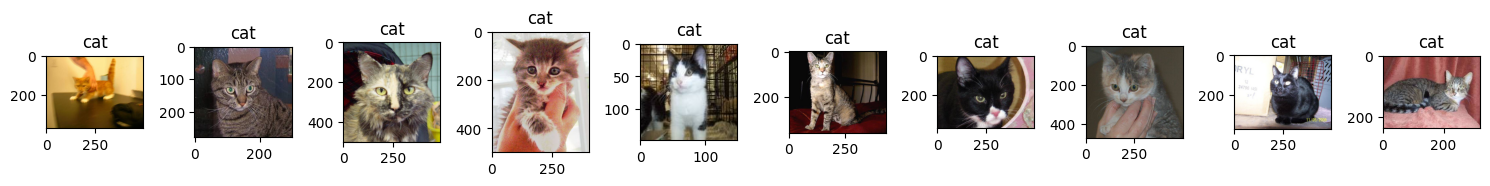

In [73]:
import matplotlib.image as mpimg

image_files = [f for f in os.listdir(extracted_path) if f.endswith('.jpg')]

num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, file in enumerate(image_files[:num_images]):

    img_path = os.path.join(extracted_path, file)
    img = mpimg.imread(img_path)
    
    axes[i].imshow(img)

    label = file.split('.')[0]  
    axes[i].set_title(label)

plt.tight_layout()
plt.show()

# Confusion Matrix

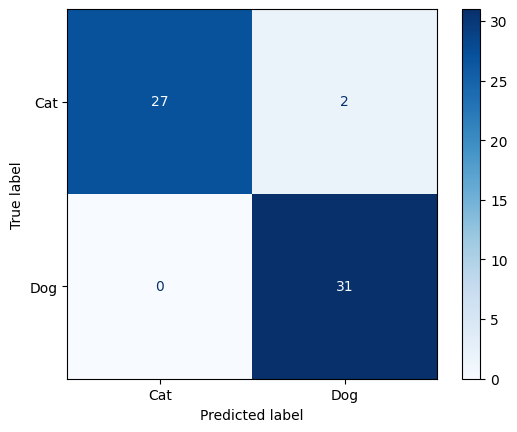

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [77]:
import joblib

joblib.dump(svm, 'svm_model.pkl')


['svm_model.pkl']